In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])
k = 4  # set number of centerroids

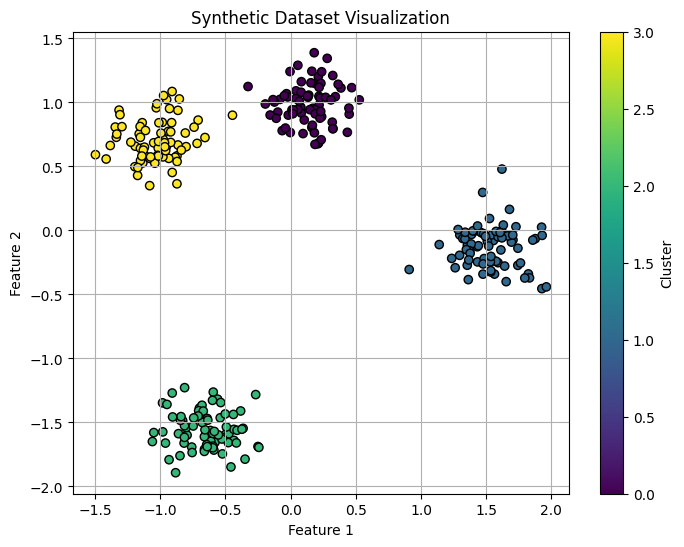

In [4]:
# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data[1], cmap='viridis', marker='o', edgecolors='k')
plt.title('Synthetic Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [10]:
def initialize_centroids(data, k):
  #Randomly initialize the centroids from the data points.
  random_indices = np.random.choice(len(data_scaled), size=4, replace=False)
  initial_centroids = data_scaled[random_indices]
  return initial_centroids

def euclidean_distance(point, centroid):
    distance = np.sqrt(np.sum((point - centroid) ** 2))
    return distance

def compute_distances(data, centroids):
  #Compute the distances between each data point and centroids.
  distances = np.zeros((len(data_scaled), k))  # k is the number of centroids
  # Compute distances between each data point and centroids
  for i, point in enumerate(data_scaled):
    for j, centroid in enumerate(initialize_centroids(data,k)):
        distances[i, j] = euclidean_distance(point, centroid)
  return distances

def assign_clusters(distances):
  cluster_assignments = np.argmin(distances, axis=1)
  return cluster_assignments

def update_centroids(data, clusters, k):
  updated_centroids = np.zeros_like(initialize_centroids(data, k))
  # Update the centroids by computing the mean of the points in each cluster
  for i in range(k):
    cluster_points = data_scaled[clusters == i]
    if len(cluster_points) > 0:
        updated_centroids[i] = np.mean(cluster_points, axis=0)

def k_means(data, k, max_iterations=100):
    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], size=k, replace=False)]

    for _ in range(max_iterations):
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        cluster_assignments = np.argmin(distances, axis=0)
        new_centroids = np.array([np.mean(data[cluster_assignments == i], axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

In [11]:
# Choose the number of clusters, K
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:", wcss)

Total within-cluster sum of squares: 17.46619760906058


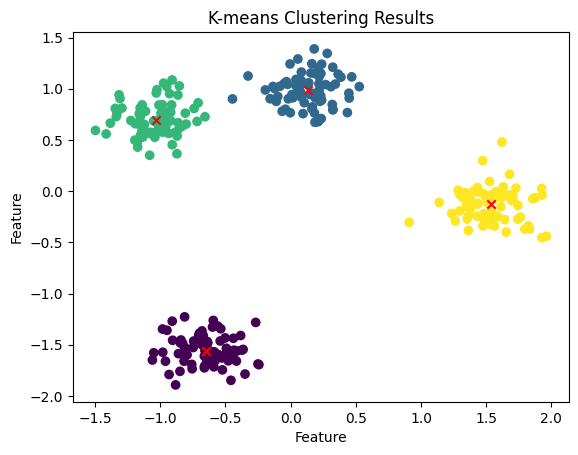

In [12]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.title("K-means Clustering Results")
plt.show()